# Dados sobre os Gols Esperados sem pênalti (npXg) | Fonte: FBRef.com

Tenho a intenção aqui de mostrar o poder ofensivo de Erling Haaland desde sua estreia na Bundesliga até sua estreia na Premier League

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preparação dos dados

In [2]:
#seleção das temporadas que o jogador participou que contém os dados de gols esperados(xG)
seasons = ['2019-2020', '2020-2021','2021-2022', '2022-2023']

In [3]:
#construção do Dataframe
dfs = []
for season in seasons:
    url = f'https://fbref.com/en/players/1f44ac21/matchlogs/{season}/summary/Erling-Haaland-Match-Logs'
    df = pd.read_html(url, header=1)[0]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    dfs.append(df)

In [4]:
df_final = pd.concat(dfs)
#salvar os dados para consultas futuras sem a necessidade de web scraping
#df_final.to_csv('erling_haaland.csv')

In [42]:
#seleção dos dados relevantes para este estudo
df_final = df_final.reset_index()
df_final = df_final[['Date', 'npxG']].dropna()

In [43]:
#amostra dos dados
df_final.head()

,Date,npxG
0,2019-09-17,1.3
1,2019-10-02,0.9
2,2019-10-23,0.6
3,2019-11-05,0.0
4,2019-11-27,0.6


Vamos criar um campo onde constam a média de 5 jogos a fim de verificarmos a evolução da carreira do atleta de forma mais intuitiva

In [44]:
df_final['npxG_avg_5'] = df_final['npxG'].rolling(5).mean()

In [45]:
df_final.head(10)

,Date,npxG,npxG_avg_5
0,2019-09-17,1.3,NaN
1,2019-10-02,0.9,NaN
2,2019-10-23,0.6,NaN
3,2019-11-05,0.0,NaN
4,2019-11-27,0.6,0.68
5,2019-12-10,0.4,0.50
6,2020-01-18,1.6,0.64
7,2020-01-24,0.9,0.70
8,2020-02-01,0.9,0.88
9,2020-02-08,0.2,0.80


## Visualização gráfica dos dados

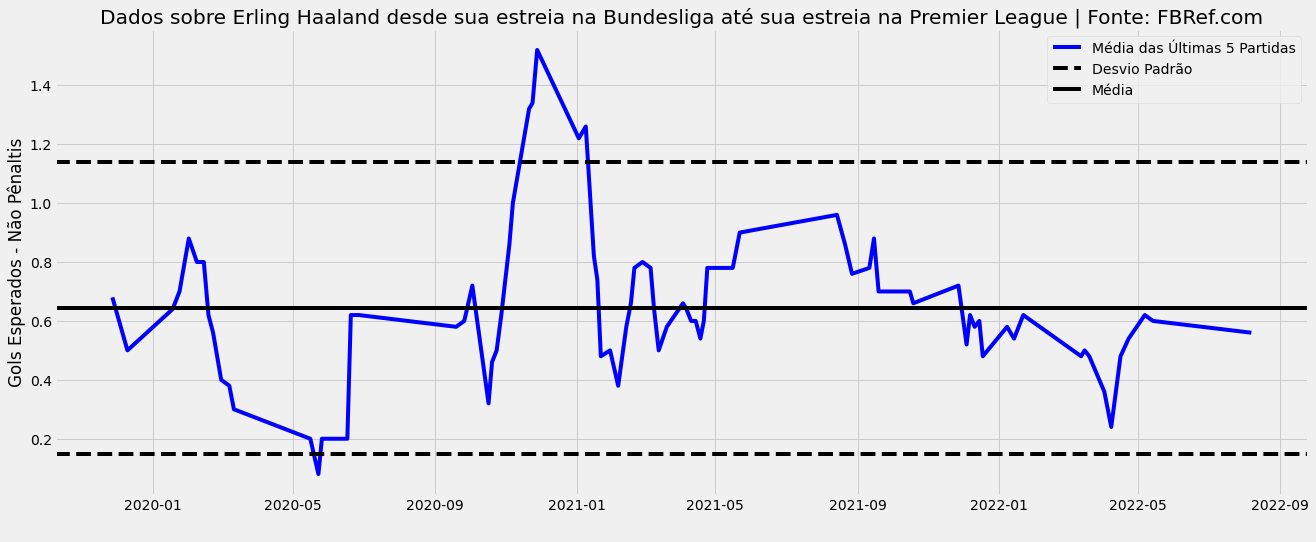

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 8))
plt.title('Dados sobre Erling Haaland desde sua estreia na Bundesliga até sua estreia na Premier League | Fonte: FBRef.com')
plt.xlabel(" ")
plt.ylabel('Gols Esperados - Não Pênaltis')
plt.axhline(y=df_final['npxG'].mean()+df_final['npxG'].std(), **{'c': 'black', 'ls': '--', 'label': 'Desvio Padrão'})
plt.axhline(y=df_final['npxG'].mean()-df_final['npxG'].std(), **{'c': 'black', 'ls': '--'})
plt.axhline(y=df_final['npxG'].mean(), color='black', **{'c': 'black', 'label': 'Média'})
plt.legend()
sns.lineplot(data=df_final, x='Date', y='npxG_avg_5', label='Média das Últimas 5 Partidas', color='blue');